In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warningsla
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

In [2]:
# Loading the CSV with pandas
data = pd.read_excel(r'C:\Users\Sai Krishna\Desktop\Lapse Propensity Model.xlsx',index_col=0,skiprows=[0,1])

In [3]:
data.head()

,status,Product Type,Product Category,Age,Gender,Underwriting Decision,Policy Term,Contribution Term,Contribution,Contribution Type,Sum assured,Channel ID,Channel Type,Occupation,Education,Smoker status,Hobbies
sno,,,,,,,,,,,,,,,,,
1,1,Protection,Non-Linked,29,Male,Accepted - Standard,48,48,46800,Regular,431000,DC0004,PS-Credit,Teacher,Graduate,Smoker,Hiking
2,0,Protection,Non-Linked,66,Female,Accepted - Standard,34,34,47500,Regular,486000,DC0004,PS-Credit,Lawyer,Graduate,Non Smoker,Reading
3,1,Protection,Non-Linked,25,Male,Accepted - Standard,43,43,31700,Regular,384000,DC0004,Agency,Engineer,Graduate,Non Smoker,Car racing
4,0,Protection,Non-Linked,26,Female,Accepted - Counter offer,41,41,30000,Regular,426000,DC0002,Agency,House wife,Graduate,Non Smoker,Reading
5,0,Protection,Non-Linked,64,Female,Accepted - Standard,9,9,13400,Regular,441000,DC0001,Agency,Engineer,Graduate,Non Smoker,Reading


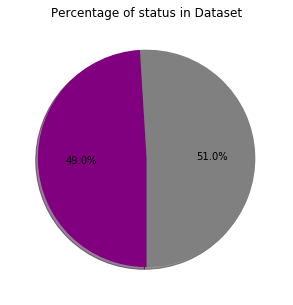

In [4]:
# Data to plot
sizes = data['status'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of status in Dataset')
plt.show()

In [5]:
data.isnull().sum() #checking missing values

status                   0
Product Type             0
Product Category         0
Age                      0
Gender                   0
Underwriting Decision    0
Policy Term              0
Contribution Term        0
Contribution             0
Contribution Type        0
Sum assured              0
Channel ID               0
Channel Type             0
Occupation               0
Education                0
Smoker status            0
Hobbies                  0
dtype: int64

In [6]:
data['Product Type'].value_counts()

Protection    172
Savings        26
Education       6
Name: Product Type, dtype: int64

In [7]:
Y = data["status"].values
X = data.drop(labels = ["status"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
            data=X_train[col].append(X_test[col])
            le.fit(data.values)
            X_train[col]=le.transform(X_train[col])
            X_test[col]=le.transform(X_test[col])

In [1]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [22]:
X_train

,Product Type,Product Category,Age,Gender,Underwriting Decision,Policy Term,Contribution Term,Contribution,Contribution Type,Sum assured,Channel ID,Channel Type,Occupation,Education,Smoker status,Hobbies
sno,,,,,,,,,,,,,,,,
162,1,0,65,1,1,38,1,264000,1,400000,3,1,2,0,1,1
118,2,1,47,1,1,23,1,69000,1,400000,3,1,0,2,1,6
17,1,1,36,1,1,30,1,92950,1,145000,1,0,4,1,0,1
94,1,0,55,1,1,23,1,225500,1,490000,3,0,2,4,1,6
148,1,1,32,1,1,31,31,37900,0,110000,1,0,0,2,1,5
130,1,1,31,0,0,34,34,4000,0,75000,1,0,6,2,0,1
81,1,1,70,1,1,20,20,31500,0,126000,3,1,7,2,0,6
19,2,1,58,1,0,40,1,85050,1,102000,3,0,3,0,1,7
180,1,1,56,1,0,45,1,146000,1,414000,3,2,2,0,1,7


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
result = model.fit(X_train, y_train)

In [14]:
from sklearn import svm

In [15]:
model = svm.SVC(kernel='linear', C=1, gamma=1)  

In [16]:
result = model.fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,result.predict(X_test))

0.8292682926829268

In [48]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,result.predict(X_test))

array([[12, 10],
       [ 7, 12]], dtype=int64)

In [56]:
result.coef_

array([[ 1.46445326e-04,  4.61034336e-04,  5.90325959e-03,
         8.36805506e-04,  1.89943622e-04,  1.56575353e-03,
        -7.29383547e-03, -9.43563547e-07,  3.07171449e-04,
        -5.50173727e-07,  3.96333522e-03,  3.72670421e-04,
        -1.08486476e-03,  8.73844417e-06,  3.88498868e-04]])

In [61]:
result.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [62]:
result.predict_proba(X_test)

array([[5.24462794e-01, 4.75537206e-01],
       [5.21270711e-01, 4.78729289e-01],
       [4.65746565e-01, 5.34253435e-01],
       [4.64114902e-01, 5.35885098e-01],
       [5.30354522e-01, 4.69645478e-01],
       [5.08472311e-01, 4.91527689e-01],
       [5.47931167e-01, 4.52068833e-01],
       [8.67845475e-01, 1.32154525e-01],
       [4.76087836e-01, 5.23912164e-01],
       [5.15243658e-01, 4.84756342e-01],
       [5.05754073e-01, 4.94245927e-01],
       [4.80842875e-01, 5.19157125e-01],
       [4.62973939e-01, 5.37026061e-01],
       [5.66077870e-01, 4.33922130e-01],
       [5.12757807e-01, 4.87242193e-01],
       [4.59265333e-01, 5.40734667e-01],
       [5.12360579e-01, 4.87639421e-01],
       [5.36906820e-01, 4.63093180e-01],
       [4.80548272e-01, 5.19451728e-01],
       [5.06264542e-01, 4.93735458e-01],
       [4.87227015e-01, 5.12772985e-01],
       [4.88664341e-01, 5.11335659e-01],
       [5.35630531e-01, 4.64369469e-01],
       [5.09555137e-01, 4.90444863e-01],
       [5.324862

In [18]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()

In [20]:
result = rand.fit(X_train,y_train)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [24]:
result =dec.fit(X_train,y_train)

In [71]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [72]:
data["Age"].groupby(data["status"]).mean()

status
0    45.701923
1    45.390000
Name: Age, dtype: float64

In [73]:
from scipy.stats import ttest_ind

In [74]:
ttest_ind(data["Age"][data["status"]==0],data["Age"][data["status"]==1])

Ttest_indResult(statistic=0.141529250282438, pvalue=0.8875929013553002)

In [80]:
from scipy.stats import chi2_contingency

In [81]:
chi2_contingency(pd.crosstab(data["Gender"],data["status"]))

(12.713651735459665,
 0.0003629959029886147,
 1,
 array([[20.39215686, 19.60784314],
        [83.60784314, 80.39215686]]))

In [79]:
pd.crosstab(data["Gender"],data["status"])

status,0,1
Gender,,
Female,31,9
Male,73,91
